In [78]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [79]:
test=pd.read_csv('./data/Test_Data.csv')
train=pd.read_csv('./data/Train_Data.csv')

In [80]:
train.head()

,SEQN,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
0,73564.0,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult
1,73568.0,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult
2,73576.0,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult
3,73577.0,32.0,1.0,2.0,28.9,104.0,NaN,84.0,16.15,Adult
4,73580.0,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult


In [81]:
bmi=train['BMXBMI']
print(type(bmi[0]))

<class 'numpy.float64'>


In [82]:
train['Gender']=train['RIAGENDR'].map({1.0:'Male',2.0: 'Female'})
train=train.rename(columns={'SEQN': 'Sequence number', 
                          'BMXBMI': 'Body Mass Index', 
                          'LBXGLU': 'Glucose level',
                          'LBXGLT': 'Glucose tolerance',
                          'LBXIN': 'Insulin level'})
train.drop(columns='RIAGENDR',inplace=True)

test['Gender']=test['RIAGENDR'].map({1.0:'Male',2.0: 'Female'})
test=test.rename(columns={'SEQN': 'Sequence number', 
                          'BMXBMI': 'Body Mass Index', 
                          'LBXGLU': 'Glucose level',
                          'LBXGLT': 'Glucose tolerance',
                          'LBXIN': 'Insulin level'})
test.drop(columns='RIAGENDR',inplace=True)

train.head(20)

,Sequence number,RIDAGEYR,PAQ605,Body Mass Index,Glucose level,DIQ010,Glucose tolerance,Insulin level,age_group,Gender
0,73564.0,61.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult,Female
1,73568.0,26.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult,Female
2,73576.0,16.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult,Male
3,73577.0,32.0,2.0,28.9,104.0,NaN,84.0,16.15,Adult,Male
4,73580.0,38.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult,Female
5,73581.0,50.0,2.0,23.6,110.0,2.0,100.0,6.08,Adult,Male
6,73587.0,14.0,2.0,38.7,94.0,2.0,202.0,21.11,Adult,Male
7,73596.0,57.0,2.0,38.3,107.0,2.0,164.0,20.93,Adult,Female
8,73607.0,75.0,2.0,38.9,89.0,2.0,113.0,17.47,Senior,Male
9,73610.0,43.0,1.0,28.9,90.0,2.0,95.0,3.24,Adult,Male


In [83]:
print(train['PAQ605'].unique())


[ 2.  1. nan  7.]


In [84]:
print(train['DIQ010'].unique())

[ 2. nan  1.  3.]


In [85]:
train['Gender'].isnull().sum()


18

In [86]:
train['age_group'].isnull().sum()

14

In [87]:
train.rename(columns={'PAQ605': 'PAQR', 'DIQ010': 'DQR'})
test.rename(columns={'PAQ605': 'PAQR', 'DIQ010': 'DQR'})

,Sequence number,RIDAGEYR,PAQR,Body Mass Index,Glucose level,DQR,Glucose tolerance,Insulin level,Gender
0,77017.0,34.0,1.0,32.2,96.0,2.0,135.0,15.11,Male
1,75580.0,12.0,2.0,26.3,100.0,2.0,141.0,15.26,Female
2,73820.0,56.0,2.0,28.6,107.0,2.0,136.0,8.82,Male
3,80489.0,20.0,1.0,22.1,93.0,2.0,111.0,12.13,Female
4,82047.0,64.0,1.0,24.7,91.0,2.0,105.0,3.12,Male
...,...,...,...,...,...,...,...,...,...
307,74150.0,20.0,2.0,21.9,82.0,2.0,82.0,2.54,Female
308,82550.0,34.0,1.0,33.3,95.0,2.0,77.0,6.36,Female
309,77835.0,64.0,2.0,41.5,91.0,2.0,149.0,15.52,Female
310,79281.0,23.0,2.0,22.5,82.0,2.0,93.0,1.39,Female


In [88]:
test.columns

Index(['Sequence number', 'RIDAGEYR', 'PAQ605', 'Body Mass Index',
       'Glucose level', 'DIQ010', 'Glucose tolerance', 'Insulin level',
       'Gender'],
      dtype='object')

In [89]:
train=train[['Sequence number', 'Gender', 'Body Mass Index', 'RIDAGEYR', 'PAQ605', 
       'Glucose level', 'DIQ010', 'Glucose tolerance', 'Insulin level',
       'age_group']]
test=test[['Sequence number', 'Gender', 'Body Mass Index', 'RIDAGEYR', 'PAQ605', 
       'Glucose level', 'DIQ010', 'Glucose tolerance', 'Insulin level']]
train.head()

,Sequence number,Gender,Body Mass Index,RIDAGEYR,PAQ605,Glucose level,DIQ010,Glucose tolerance,Insulin level,age_group
0,73564.0,Female,35.7,61.0,2.0,110.0,2.0,150.0,14.91,Adult
1,73568.0,Female,20.3,26.0,2.0,89.0,2.0,80.0,3.85,Adult
2,73576.0,Male,23.2,16.0,2.0,89.0,2.0,68.0,6.14,Adult
3,73577.0,Male,28.9,32.0,2.0,104.0,NaN,84.0,16.15,Adult
4,73580.0,Female,35.9,38.0,1.0,103.0,2.0,81.0,10.92,Adult


In [90]:
train.isnull().sum()

Sequence number      12
Gender               18
Body Mass Index      18
RIDAGEYR              9
PAQ605               13
Glucose level        13
DIQ010               18
Glucose tolerance    11
Insulin level         9
age_group            14
dtype: int64

In [91]:
test.isnull().sum()


Sequence number      2
Gender               2
Body Mass Index      1
RIDAGEYR             3
PAQ605               1
Glucose level        1
DIQ010               1
Glucose tolerance    2
Insulin level        1
dtype: int64

In [92]:
train[train.isnull().any(axis=1)]


,Sequence number,Gender,Body Mass Index,RIDAGEYR,PAQ605,Glucose level,DIQ010,Glucose tolerance,Insulin level,age_group
3,73577.0,Male,28.9,32.0,2.0,104.0,NaN,84.0,16.15,Adult
38,73767.0,Female,19.0,35.0,2.0,93.0,2.0,86.0,NaN,Adult
40,73773.0,Female,23.4,39.0,NaN,83.0,2.0,120.0,1.63,Adult
84,74047.0,Female,NaN,40.0,2.0,107.0,2.0,103.0,11.09,Adult
108,74170.0,Male,NaN,56.0,2.0,111.0,2.0,193.0,9.61,Adult
...,...,...,...,...,...,...,...,...,...,...
1928,83524.0,Female,19.9,55.0,2.0,NaN,2.0,118.0,4.37,Adult
1948,83637.0,Male,NaN,40.0,2.0,98.0,2.0,83.0,52.64,Adult
1954,83678.0,NaN,18.3,42.0,2.0,97.0,2.0,154.0,3.39,Adult
1957,83692.0,NaN,19.1,68.0,2.0,89.0,2.0,136.0,1.56,Senior


In [93]:
train['Body Mass Index'].agg(['min','max','median','mean'])

min       14.5000
max       70.1000
median    26.8000
mean      27.9654
Name: Body Mass Index, dtype: float64

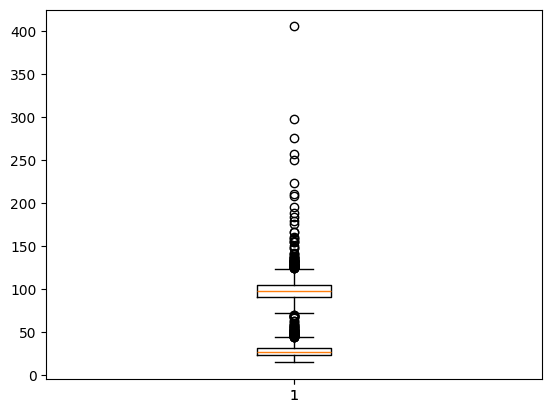

In [ ]:
# plt.boxplot(train['Body Mass Index'].dropna(),showfliers=True)
plt.boxplot([train['Body Mass Index'].dropna(),train['Glucose level'].dropna()])

plt.show()